In [ ]:
from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


# Redes de classificação:
Selecione um dataset e crie uma rede de classificação. Avalie o resultado com duas configurações diferentes. As configurações devem mudar no mínimo 3 hiperparâmetros (por exemplo, parâmetros do optimizer,  loss, número de camadas, função de ativação, normalização).

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import imageio
import cv2
import torch


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Shape of y_train_c10: (50000, 10), dtype: <dtype: 'float32'>
Unique values in y_train_c10: [0. 1.]


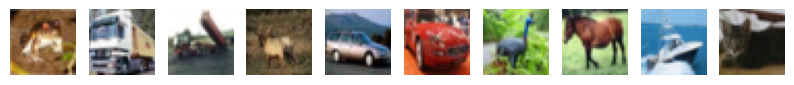

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train_c10,y_train_c10),(x_test_c10,y_test_c10) = cifar10.load_data()

x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
y_train_c10 = tf.squeeze(tf.one_hot(y_train_c10, 10), axis=1)
y_test_c10 = tf.squeeze(tf.one_hot(y_test_c10, 10), axis=1)

print(f"Shape of y_train_c10: {y_train_c10.shape}, dtype: {y_train_c10.dtype}")
print(f"Unique values in y_train_c10: {np.unique(y_train_c10)}")



fig, ax = plt.subplots(1, 10, figsize=(10, 2))
for i in range(10):
    ax[i].imshow(x_train_c10[i])
    ax[i].axis('off')

Realizei carregamento da base de dados cifar10. Normalizei os dados no conjunto de treinamneto e de teste. Exibí as figuras de treinamento em subplot, após realizar o tf.squeeze e o tf.one_hot, para selecionar os dados ao longo do axis=1. O objetivo foi formatar corretamente os dados.

(1, 30, 30, 16)


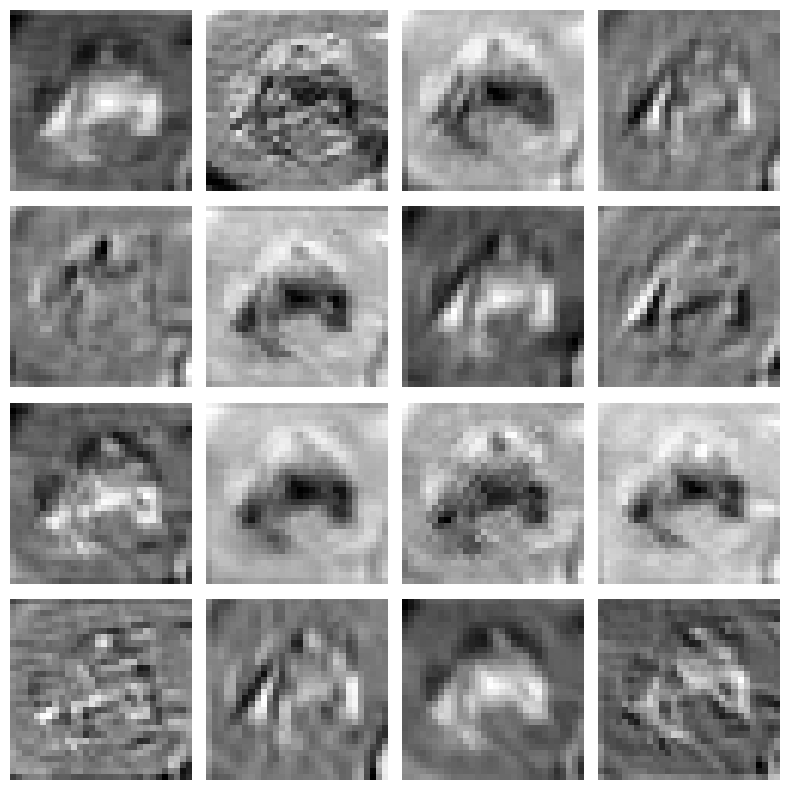

In [ ]:

# Normalizar as imagens (opcional)
x_train_c10 = x_train_c10 / 255.0

# Criar a camada Conv2D
conv = tf.keras.layers.Conv2D(16, (3, 3))

# Aplicar a convolução em uma única imagem
y_conv = conv(tf.expand_dims(x_train_c10[0], axis=0))

# Obter a forma de saída
print(y_conv.shape)  # Esperado: (1, altura, largura, 16)

# Plotar os 16 mapas de ativação
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(y_conv[0, :, :, i * 4 + j], cmap='gray')  # Seleciona cada filtro
        ax[i, j].axis('off')
plt.tight_layout()
plt.show()


(1, 15, 15, 16)


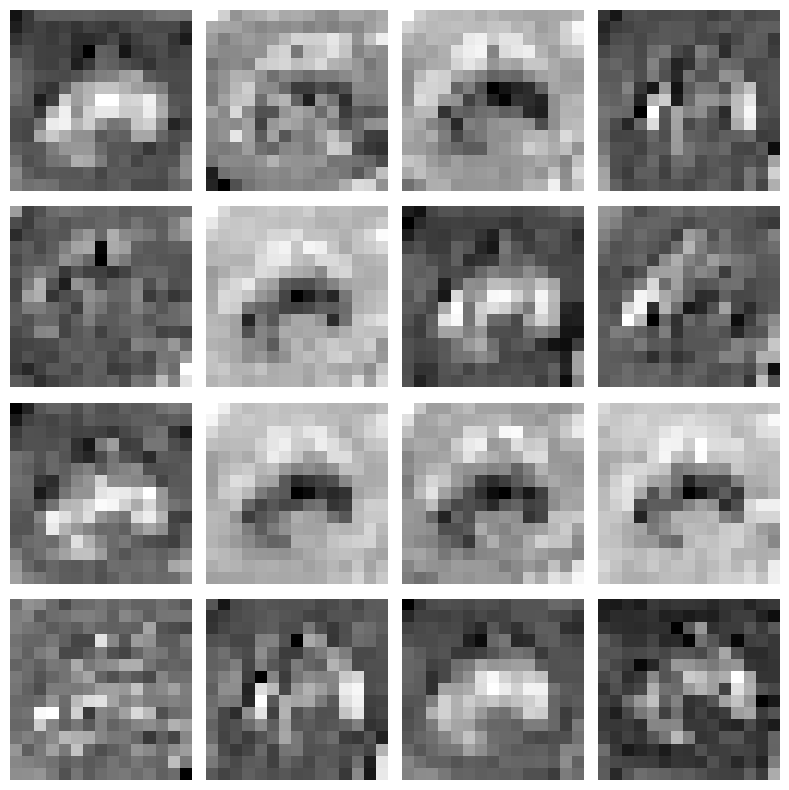

In [ ]:
mp = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))
y_mp = mp(y_conv)

# Obter a forma de saída
print(y_mp.shape)  # Esperado: (1, altura reduzida, largura reduzida, 16)

# Plotar os 16 mapas de ativação após MaxPool
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(y_mp[0, :, :, i * 4 + j], cmap='gray')  # Seleciona cada filtro
        ax[i, j].axis('off')
plt.tight_layout()
plt.show()

Utilizei outra camada, nesse caso, um MaxPool2D, com stride considerado razoável (3, 3) para esse caso, e com pool_size = (2, 2). Apliquei esse Max Pooling no resultado da convolução. Realizei plots (subplots) dessa segunda operação.

In [ ]:
flatten = tf.keras.layers.Flatten()

y_flat = flatten(y_mp)
print(y_flat.shape)

(1, 3600)


Nesse caso, obtive uma instância da camada com o flatten.

<BarContainer object of 10 artists>

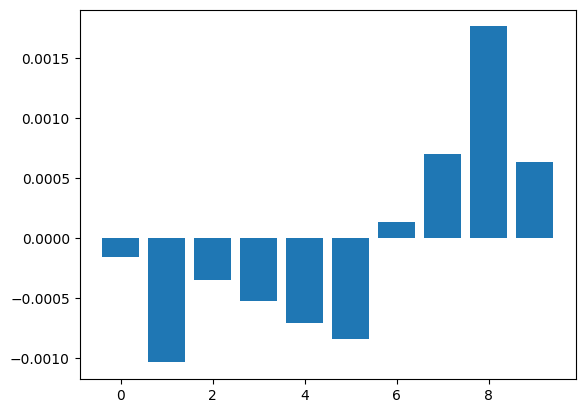

In [ ]:
dense = tf.keras.layers.Dense(10)

y_dense = dense(y_flat)
plt.bar(np.arange(10), y_dense[0])

Realiza uma operação semelhante, retornando o tensor de saída da camada apenas na primeira vez em que esse método é chamado

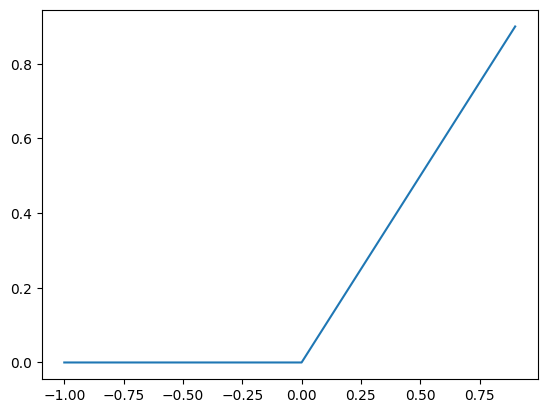

In [ ]:
relu = tf.keras.layers.ReLU()

x = np.arange(-1,1,0.1)

plt.plot(x, relu(x))

Define o ReLU

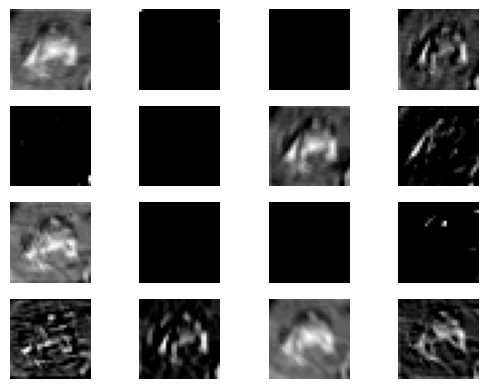

In [ ]:
y_relu = relu(y_conv)

fig, ax = plt.subplots(4,4)
for i in range(4):
  for j in range(4):
    ax[i][j].imshow(y_relu[0, :, :, i*4+j], cmap='gray')
    ax[i][j].axis('off')

Aplica o ReLU no output da operação de convolução

<BarContainer object of 10 artists>

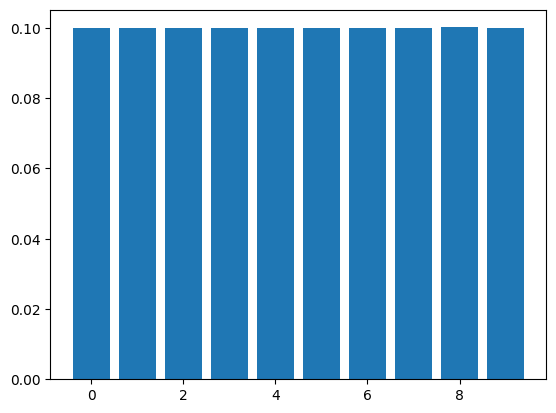

In [ ]:
softmax = tf.keras.layers.Softmax()

y_softmax = softmax(y_dense)

plt.bar(np.arange(10), y_softmax[0])

Instancia o softmax e aplica-o no tensor gerado com o tf.keras.layers..Dense()

In [ ]:
mse = tf.keras.losses.MSE(y_train_c10[0], y_softmax[0])
print(mse)

tf.Tensor(0.0899966, shape=(), dtype=float32)


Obtive o MSE da perda loss = mean(square(y_true - y_pred), axis=-1)

In [ ]:

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)

bce_value = bce(y_train_c10[0], y_softmax[0])
print(bce_value)

tf.Tensor(0.3250641, shape=(), dtype=float32)


Outra métrica importante e essencial nesses casos de VC por deep learning

In [ ]:

optimizer=tf.keras.optimizers.SGD()

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD



Aqui, modificaria o loss ou outros hiper-parâmetros que você sugeriu. Preferi não fazer porque o tempo estava curto para usar GPUs que haviam se consumido ao longo deste trabalho, e eventualmente de alguma outro trabalho.

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = cifar10.load_data()

# Normalize input images
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0

# Ensure integer labels with the correct shape
y_train_c10 = np.squeeze(y_train_c10).astype('int32')
y_test_c10 = np.squeeze(y_test_c10).astype('int32')


print(f"Shape of x_train_c10: {x_train_c10.shape}")
print(f"Shape of y_train_c10: {y_train_c10.shape}, dtype: {y_train_c10.dtype}")
print(f"Unique values in y_train_c10: {np.unique(y_train_c10)}")


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(16, (1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


history = model.fit(x_train_c10, y_train_c10, batch_size=4, epochs=10)


Shape of x_train_c10: (50000, 32, 32, 3)
Shape of y_train_c10: (50000,), dtype: int32
Unique values in y_train_c10: [0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.3003 - loss: 1.9253
Epoch 2/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4912 - loss: 1.4315
Epoch 3/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.5391 - loss: 1.3089
Epoch 4/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.5665 - loss: 1.2352
Epoch 5/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5874 - loss: 1.1899
Epoch 6/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5979 - loss: 1.1505
Epoch 7/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6084 - loss: 1.1176
Epoch 8/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6169 - loss: 1.1053
Epoch 9/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6262 - loss: 1.0802
Epoch 10/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6267 - loss: 1.0712


Na célula acima, **parte do código não é necessária** pois já foi definida

cifar10 = tf.keras.datasets.cifar10 (x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = cifar10.load_data()

# Normalize input images

x_train_c10 = x_train_c10 / 255.0 x_test_c10 = x_test_c10 / 255.0

O código das linhas:

y_train_c10 = np.squeeze(y_train_c10).astype('int32') y_test_c10 = np.squeeze(y_test_c10).astype('int32')

foi usado porque o formato realizado ao início deste notebook não se demonstrou correto

Test Loss: 1.1293
Test Accuracy: 0.6123


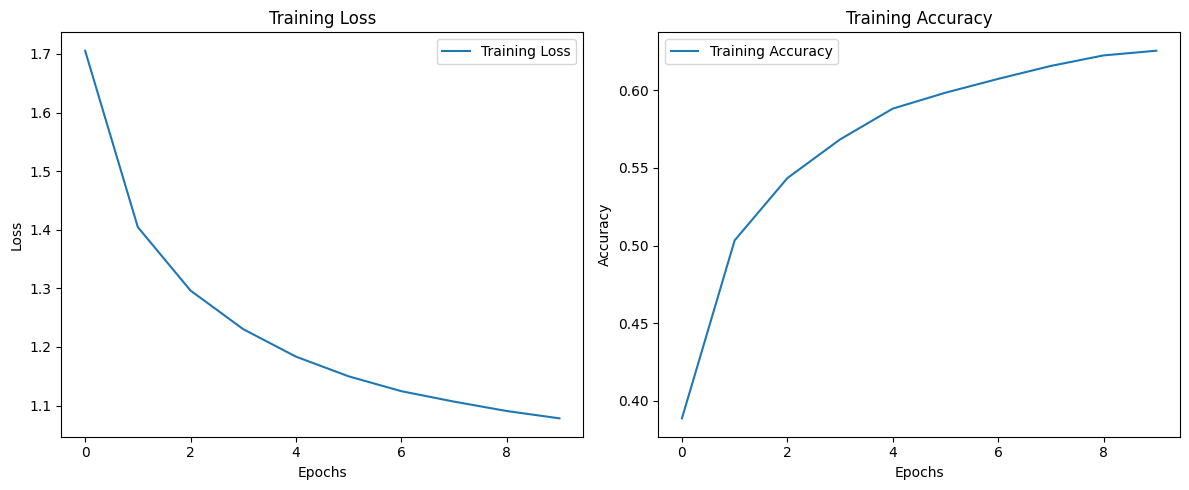

In [ ]:

test_loss, test_accuracy = model.evaluate(x_test_c10, y_test_c10, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


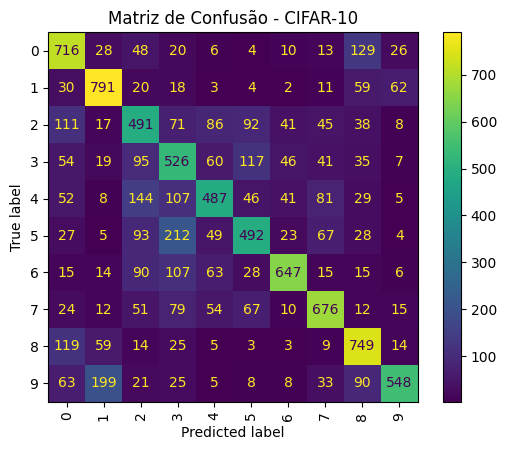

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test_c10)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test_c10, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Matriz de Confusão - CIFAR-10")
plt.show()


A matriz de confusão demonstrou que o modelo foi razoável. Apesar de satisfório, houveram maiores confusões entre determinadas classes. Por exemplo, cat (3) e dog (5), por possuirem semelhança em determinadas casos e situações, apresentaram altas quantidades de falsos positivos (esperava-se um objeto da classe dog, mas identificou um objeto da classe cat.